## Data Preprocessing

### Importing the libraries

In [315]:
import numpy as np
import pandas as pd

### Importing the dataset

In [329]:
dataset = pd.read_csv('dataset.csv', sep=";")
X = dataset.iloc[:, 0:22].values
y = dataset.iloc[:, 22].values

### Encoding cyclical continuous features


#### Months

In [330]:
months_in_year = 12
months = X[:, 1]

sin_month = np.sin(2*np.pi*months/months_in_year)
cos_month = np.cos(2*np.pi*months/months_in_year)

# remove month original collumn
X = np.delete(X, 1, 1)

# insert new collums features
X = np.insert(X, 1, sin_month, 1)
X = np.insert(X, 2, cos_month, 1)

#### hours

In [331]:
hours_in_day = 24
hours = X[:, 4]

sin_hour = np.sin(2*np.pi*hours/hours_in_day)
cos_hour = np.cos(2*np.pi*hours/hours_in_day)

# remove month original collumn
X = np.delete(X, 4, 1)

# insert new collums features
X = np.insert(X, 4, sin_hour, 1)
X = np.insert(X, 5, cos_hour, 1)

#### weekdays

In [332]:
number_of_weekdays = 7
weekdays = X[:, 6]

sin_weekdays = np.sin(2*np.pi*weekdays/number_of_weekdays)
cos_weekdays = np.cos(2*np.pi*weekdays/number_of_weekdays)

# remove month original collumn
X = np.delete(X, 6, 1)

# insert new collums features
X = np.insert(X, 6, sin_weekdays, 1)
X = np.insert(X, 7, cos_weekdays, 1)

In [339]:
X

NameError: name 'nan' is not defined

### Splitting the dataset into the Training set and Test set

In [304]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

### Feature Scaling

In [305]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Correlation matrix

In [340]:
values = np.insert(X, X.shape[1], y, 1)
dataframe = pd.DataFrame(values)
corr = dataframe.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1,0.085757,0.0272961,0.00195374,6.14327e-18,1.52312e-05,-0.0138034,0.00341257,0.000711398,0.0814717,0.0680176,0.0973975,0.0856124,0.120034,0.120034,0.164633,0.0844461,-0.00588424,0.0884156,0.10787,0.088886,0.0844841,-0.0559455,0.0739443,0.0862758,0.69849
1,0.085757,1,-0.00505619,-0.0148172,4.4091e-17,0.000183144,0.0100193,-0.00377083,0.0561538,-0.264507,-0.509839,-0.157584,0.43064,0.172442,0.172442,-0.00988793,0.549956,0.404676,0.290874,0.530567,-0.116017,0.514404,0.532452,0.361485,0.544464,0.123344
2,0.0272961,-0.00505619,1,-0.00416651,-7.42469e-18,-0.000142249,-0.00933923,0.00405646,0.0419609,0.177249,0.0277692,0.275514,0.662893,0.481385,0.481385,0.433752,0.436792,0.48484,0.488784,0.471058,0.339915,0.446249,0.554177,0.544441,0.612478,0.127223
3,0.00195374,-0.0148172,-0.00416651,1,-1.40396e-17,2.60049e-05,0.00066393,-0.000920882,-0.0593175,0.0345031,0.0150917,0.00351195,-0.0343501,0.0187521,0.0187521,-0.0359514,-0.0278812,-0.0114225,-0.0353379,-0.0215249,-0.0167751,-0.0171849,-0.0180165,-0.0323586,-0.030667,0.00785396
4,6.14327e-18,4.4091e-17,-7.42469e-18,-1.40396e-17,1,-3.71194e-17,4.45713e-17,2.00408e-17,-2.28045e-17,7.11929e-19,1.629e-18,-1.40295e-18,-2.64613e-18,-3.2079e-18,-3.2079e-18,-7.2064e-18,5.32524e-18,-5.70883e-19,-5.2061e-18,-1.71564e-18,8.42393e-19,-3.18715e-19,-3.27014e-18,-3.2882e-18,3.21168e-18,-0.44278
5,1.52312e-05,0.000183144,-0.000142249,2.60049e-05,-3.71194e-17,1,0.000164368,-0.000150317,-3.34087e-05,-0.000217332,-0.000208998,-0.000262744,-5.59224e-05,-0.000228103,-0.000228103,-0.000248535,-7.85658e-05,-5.58039e-05,-0.000113879,-8.47176e-05,-0.000175481,-0.000105675,-0.000103572,-7.34638e-05,-1.52194e-05,-0.112427
6,-0.0138034,0.0100193,-0.00933923,0.00066393,4.45713e-17,0.000164368,1,0.00649345,0.0235564,-0.0282188,0.0132679,-0.0255795,0.0034082,-0.00892806,-0.00892806,0.0030068,0.016978,0.00320409,-0.0214408,0.000356663,0.00118823,-0.0136393,0.00888359,-0.000254327,0.000199534,0.215391
7,0.00341257,-0.00377083,0.00405646,-0.000920882,2.00408e-17,-0.000150317,0.00649345,1,-0.0189504,0.00441718,0.0158827,0.0107459,-0.00276995,-0.00876897,-0.00876897,-0.0046397,-0.0138764,-0.00393475,-0.009965,-0.0133701,-0.0190516,-0.000799672,0.00968024,-0.00177859,-0.00251243,-0.121231
8,0.000711398,0.0561538,0.0419609,-0.0593175,-2.28045e-17,-3.34087e-05,0.0235564,-0.0189504,1,-0.00228755,-0.0342759,0.0103455,0.0440767,0.0324669,0.0324669,0.0339448,0.0505581,0.0419157,0.0412576,0.0469527,0.0239868,0.0506822,0.06648,0.0317479,0.0466959,-0.102613
9,0.0814717,-0.264507,0.177249,0.0345031,7.11929e-19,-0.000217332,-0.0282188,0.00441718,-0.00228755,1,0.225607,0.780497,0.0745809,0.475537,0.475537,0.139625,-0.0195852,0.192564,0.318656,-0.000637861,0.470395,0.165934,-0.0105059,0.222356,0.0758155,0.10818


# Neural Networking Training

## Importing Keras lib

In [260]:
import keras
from keras.models import Sequential # used to initialize the NN
from keras.layers import Dense # create the layers
from keras.callbacks import History

## Initialising ANN

In [261]:
network = Sequential()

## Adding layers

In [227]:
network.add(Dense(input_dim=X_train.shape[1], output_dim=1, activation='linear', bias_initializer='random_uniform'))

/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=24, activation="linear", bias_initializer="random_uniform", units=1)`
  """Entry point for launching an IPython kernel.


## Compile and register history

In [228]:
network.compile(optimizer='adam', loss='mean_squared_error')
history = History()

## Train

In [229]:
network.fit(X_train, y_train, epochs=50, callbacks=[history])
y_pred = network.predict(X_test)

Epoch 1/50
93339/93339 [==============================] - 4s 38us/step - loss: 2773.8340
Epoch 2/50
93339/93339 [==============================] - 3s 29us/step - loss: 2453.5311
Epoch 3/50
93339/93339 [==============================] - 3s 29us/step - loss: 2164.0268
Epoch 4/50
93339/93339 [==============================] - 3s 29us/step - loss: 1899.0975
Epoch 5/50
93339/93339 [==============================] - 3s 29us/step - loss: 1655.5923
Epoch 6/50
93339/93339 [==============================] - 3s 29us/step - loss: 1431.4843
Epoch 7/50
93339/93339 [==============================] - 3s 29us/step - loss: 1225.3311
Epoch 8/50
93339/93339 [==============================] - 3s 29us/step - loss: 1036.3722
Epoch 9/50
93339/93339 [==============================] - 3s 33us/step - loss: 864.3183
Epoch 10/50
93339/93339 [==============================] - 3s 32us/step - loss: 708.7610
Epoch 11/50
93339/93339 [==============================] - 3s 31us/step - loss: 569.6550
Epoch 12/50
93339/9333

# Ploting results

## Ploting training loss function over epochs

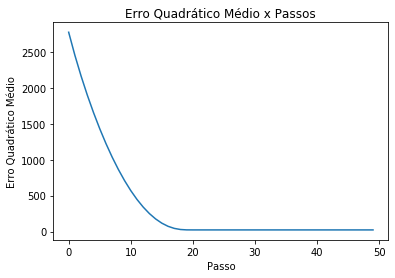

In [232]:
import matplotlib.pyplot as plt

file = plt.figure()
plt.plot(history.history['loss'])
plt.title('Erro Quadrático Médio x Passos')
plt.ylabel('Erro Quadrático Médio')
plt.xlabel('Passo')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-network1.pdf", bbox_inches='tight')

In [236]:
y_mean = np.mean(y)
error = history.history['loss'][-1]
percentage_error = error/y_mean * 100
percentage_error

42.75576598531958

## Ploting data samples

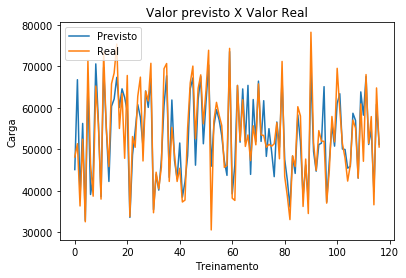

In [83]:
plt.plot([y_pred[n] for n in range(0, len(y_pred)) if n % 200 == 0])
plt.plot([y_test[n] for n in range(0, len(y_pred)) if n % 200 == 0])
plt.title('Valor previsto X Valor Real')
plt.ylabel('Carga')
plt.xlabel('Treinamento')
plt.legend(['Previsto', 'Real'], loc='upper left')
plt.show()

# Others networks exp

### 2 layers, relu + linear

In [262]:
network = Sequential()
network.add(Dense(input_dim=X_train.shape[1], output_dim=44, activation='relu', bias_initializer='random_normal'))
network.add(Dense(output_dim=1, activation='linear', bias_initializer='random_normal'))
network.compile(optimizer='adam', loss='mean_squared_error')
history = History()

network.fit(X_train, y_train, epochs=50, callbacks=[history])
y_pred = network.predict(X_test)

/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=25, activation="relu", bias_initializer="random_normal", units=44)`
  
/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", bias_initializer="random_normal", units=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/50
93339/93339 [==============================] - 4s 41us/step - loss: 350.0948
Epoch 2/50
93339/93339 [==============================] - 3s 31us/step - loss: 18.0374
Epoch 3/50
93339/93339 [==============================] - 3s 31us/step - loss: 11.1279
Epoch 4/50
93339/93339 [==============================] - 3s 31us/step - loss: 8.4726
Epoch 5/50
93339/93339 [==============================] - 3s 32us/step - loss: 7.0232
Epoch 6/50
93339/93339 [==============================] - 3s 32us/step - loss: 6.0399
Epoch 7/50
93339/93339 [==============================] - 3s 31us/step - loss: 5.3640
Epoch 8/50
93339/93339 [==============================] - 3s 31us/step - loss: 4.8917
Epoch 9/50
93339/93339 [==============================] - 3s 31us/step - loss: 4.5525
Epoch 10/50
93339/93339 [==============================] - 3s 31us/step - loss: 4.2713
Epoch 11/50
93339/93339 [==============================] - 3s 31us/step - loss: 4.0551
Epoch 12/50
93339/93339 [=======================

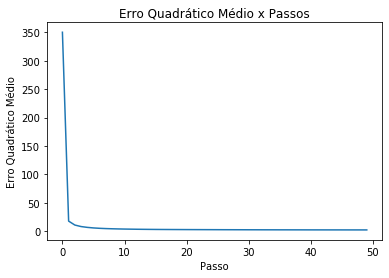

In [263]:
file = plt.figure()
plt.plot(history.history['loss'])
plt.title('Erro Quadrático Médio x Passos')
plt.ylabel('Erro Quadrático Médio')
plt.xlabel('Passo')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-network2.pdf", bbox_inches='tight')

In [264]:
y_mean = np.mean(y)
error = history.history['loss'][-1]
percentage_error = error/y_mean * 100
percentage_error

4.79239886227257

## Cleaning data


In [95]:
X = np.delete(X, [10, 22], 1)

/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  """Entry point for launching an IPython kernel.


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [97]:
network = Sequential()
network.add(Dense(input_dim=X_train.shape[1], output_dim=44, activation='relu', bias_initializer='random_normal'))
network.add(Dense(output_dim=1, activation='linear', bias_initializer='random_normal'))
network.compile(optimizer='adam', loss='mean_absolute_percentage_error')
history = History()

network.fit(X_train, y_train, epochs=50, callbacks=[history])
y_pred = network.predict(X_test)

/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=21, activation="relu", bias_initializer="random_normal", units=44)`
  
/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", bias_initializer="random_normal", units=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/50
93339/93339 [==============================] - 3s 33us/step - loss: 98.1548
Epoch 2/50
93339/93339 [==============================] - 2s 25us/step - loss: 88.7821
Epoch 3/50
93339/93339 [==============================] - 2s 25us/step - loss: 73.8333
Epoch 4/50
93339/93339 [==============================] - 2s 25us/step - loss: 59.3178
Epoch 5/50
93339/93339 [==============================] - 2s 26us/step - loss: 48.6740
Epoch 6/50
93339/93339 [==============================] - 2s 27us/step - loss: 42.2998
Epoch 7/50
93339/93339 [==============================] - 2s 25us/step - loss: 39.3655
Epoch 8/50
93339/93339 [==============================] - 2s 26us/step - loss: 37.4061
Epoch 9/50
93339/93339 [==============================] - 2s 25us/step - loss: 35.4154
Epoch 10/50
93339/93339 [==============================] - 2s 26us/step - loss: 33.2722
Epoch 11/50
93339/93339 [==============================] - 2s 26us/step - loss: 31.0378
Epoch 12/50
93339/93339 [================

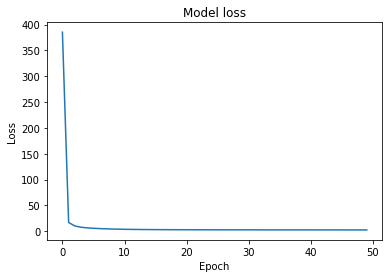

In [198]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [200]:
sc = StandardScaler()
y_last = network.predict(sc.fit_transform(X))

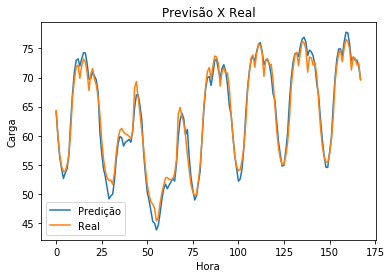

In [203]:
plt.plot(y_last[-24*7:], label="Predição")
plt.plot(y[-24*7:], label="Real")
plt.legend(loc='best')

plt.title('Previsão X Real')
plt.ylabel('Carga')
plt.xlabel('Hora')
plt.show()

# Cleaning Data

### Correlation input-output

In [328]:
values = np.insert(X, X.shape[1], y, 1)
dataframe = pd.DataFrame(values)
corr = dataframe.corr(min_periods=1000)
corr[25]

0     0.698490
1     0.123344
2     0.127223
3     0.007854
4    -0.442780
5    -0.112427
6     0.215391
7    -0.121231
8    -0.102613
9     0.108180
10    0.024375
11    0.069524
12    0.140164
13   -0.000637
14         NaN
15    0.126220
16   -0.189462
17    0.001770
18    0.075131
19    0.049797
20   -0.025860
21   -0.004654
22   -0.210539
23    0.074986
24   -0.009270
25    1.000000
Name: 25, dtype: float64

### Correlation inputs

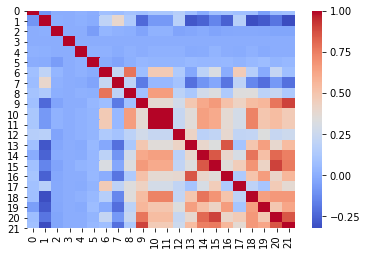

In [285]:
import seaborn as sns

dataframe = pd.DataFrame(X)
corr = dataframe.corr()
corr.style.background_gradient(cmap='coolwarm')

sns_plot = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm').get_figure()
sns_plot.savefig("../brazilian-load-prediction/imagens/correlation.pdf")

In [298]:
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1,0.085757,0.0272961,0.00195374,6.14327e-18,1.52312e-05,-0.0138034,0.00341257,0.000711398,0.0814717,0.0680176,0.0473858,0.0872662,0.00789845,nan,0.171698,-0.0998839,-0.120125,0.0939593,0.0120751,-0.0197439,0.0448924,-0.20786,0.0399829,0.0392418
1,0.085757,1,-0.00505619,-0.0148172,4.4091e-17,0.000183144,0.0100193,-0.00377083,0.0561538,-0.264507,-0.509839,0.0990814,0.42627,-0.0776283,nan,-0.00913491,-0.0860275,-0.0434355,-0.0270513,-0.316939,-0.374825,0.194438,-0.157937,-0.198246,0.201432
2,0.0272961,-0.00505619,1,-0.00416651,-7.42469e-18,-0.000142249,-0.00933923,0.00405646,0.0419609,0.177249,0.0277692,0.204527,0.560438,-0.249212,nan,0.132571,-0.535543,0.0741794,-0.270992,-0.0604799,-0.257315,0.169985,0.0655558,-0.308462,-0.065765
3,0.00195374,-0.0148172,-0.00416651,1,-1.40396e-17,2.60049e-05,0.00066393,-0.000920882,-0.0593175,0.0345031,0.0150917,-0.0401002,-0.0379012,0.0533627,nan,-0.0381124,0.00827015,-0.00352176,-0.0459325,0.0367023,0.0149593,0.00996721,0.00290591,0.0199277,0.010342
4,6.14327e-18,4.4091e-17,-7.42469e-18,-1.40396e-17,1,-3.71194e-17,4.45713e-17,2.00408e-17,-2.28045e-17,7.11929e-19,1.629e-18,7.27999e-18,-3.4645e-18,1.00077e-18,nan,2.58954e-19,5.71308e-20,1.10157e-19,2.06326e-19,-2.16644e-19,-1.02263e-18,-9.52739e-19,-2.18623e-18,1.87931e-18,-5.31906e-19
5,1.52312e-05,0.000183144,-0.000142249,2.60049e-05,-3.71194e-17,1,0.000164368,-0.000150317,-3.34087e-05,-0.000217332,-0.000208998,-0.000131076,-4.88112e-05,-5.47132e-05,nan,-0.000224383,0.000116357,-1.93715e-05,5.39172e-05,-5.8955e-05,-4.16849e-05,-6.1596e-05,-2.04049e-05,5.4311e-05,0.000135318
6,-0.0138034,0.0100193,-0.00933923,0.00066393,4.45713e-17,0.000164368,1,0.00649345,0.0235564,-0.0282188,0.0132679,-0.00340925,0.00516528,0.00255718,nan,0.00652567,0.00660857,-0.00394269,-0.0348479,0.00263568,0.0223027,-0.00206733,0.0169871,-0.00150813,-0.00626245
7,0.00341257,-0.00377083,0.00405646,-0.000920882,2.00408e-17,-0.000150317,0.00649345,1,-0.0189504,0.00441718,0.0158827,0.0112832,-0.0037843,-0.0156792,nan,-0.00650162,0.00176089,0.00766318,-0.0163118,0.00411905,-0.020982,0.0177478,0.0174654,0.0124979,-0.00703915
8,0.000711398,0.0561538,0.0419609,-0.0593175,-2.28045e-17,-3.34087e-05,0.0235564,-0.0189504,1,-0.00228755,-0.0342759,0.0195253,0.0381811,-0.00943414,nan,0.022882,-0.0238792,0.00555364,-0.0016608,-0.0289066,-0.0119074,0.0165525,0.0115687,-0.053882,0.0139565
9,0.0814717,-0.264507,0.177249,0.0345031,7.11929e-19,-0.000217332,-0.0282188,0.00441718,-0.00228755,1,0.225607,-0.0800444,0.069224,0.0266826,nan,0.0925175,-0.168111,0.236931,-0.145156,-0.0429187,0.0725073,0.133024,-0.171979,0.0553903,-0.275995


### Cleaning inputs

In [378]:
import math

number_of_features = X.shape[1]

new_X = X
dataframe = pd.DataFrame(new_X)
corr = dataframe.corr()

for i in range(number_of_features):
    for j in range(0,i):
        if math.fabs(corr[i][j]) > 0.2 and corr[i][j] < 1:
            new_X[:, i] = new_X[:, i] - corr[i][j] * new_X[:, j]

In [373]:
dataframe = pd.DataFrame(new_X)
corr = dataframe.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1,0.085757,0.0272961,0.00195374,6.14327e-18,1.52312e-05,-0.0138034,0.00341257,0.000711398,0.0814717,0.10857,0.0473858,0.0759204,0.0401927,0.0401927,0.171698,-0.0735695,-0.100758,0.139158,0.0119808,0.0399047,0.0174399,-0.134969,0.10494,0.0193288
1,0.085757,1,-0.00505619,-0.0148172,4.4091e-17,0.000183144,0.0100193,-0.00377083,0.0561538,-0.264507,-0.213631,0.0990814,0.263509,-0.000959753,-0.000959753,-0.00913491,-0.177682,0.131829,0.0618429,-0.264597,-0.0972894,0.0813799,-0.0679983,-0.123671,-0.139528
2,0.0272961,-0.00505619,1,-0.00416651,-7.42469e-18,-0.000142249,-0.00933923,0.00405646,0.0419609,0.177249,0.0296873,0.204527,0.263724,-0.043837,-0.043837,0.132571,-0.240105,0.187959,-0.0645347,-0.160899,0.00756795,-0.0915929,0.00960016,-0.00555704,-0.133569
3,0.00195374,-0.0148172,-0.00416651,1,-1.40396e-17,2.60049e-05,0.00066393,-0.000920882,-0.0593175,0.0345031,0.0117248,-0.0401002,-0.0432615,0.0477328,0.0477328,-0.0381124,0.0356578,-0.0262502,-0.0658733,-0.025267,0.00308464,-0.010104,-0.0238475,0.0127186,0.0503081
4,6.14327e-18,4.4091e-17,-7.42469e-18,-1.40396e-17,1,-3.71194e-17,4.45713e-17,2.00408e-17,-2.28045e-17,7.11929e-19,-2.9817e-18,7.27999e-18,-3.01838e-18,1.16067e-20,1.16067e-20,2.58954e-19,-2.30338e-18,-3.94985e-18,9.54937e-19,6.80076e-19,-2.70579e-18,2.5049e-19,-4.10749e-18,-4.23739e-19,-1.11429e-18
5,1.52312e-05,0.000183144,-0.000142249,2.60049e-05,-3.71194e-17,1,0.000164368,-0.000150317,-3.34087e-05,-0.000217332,-0.000170426,-0.000131076,-5.12262e-05,-0.000105584,-0.000105584,-0.000224383,-2.48075e-06,2.23156e-05,2.91902e-06,5.97229e-05,-5.80735e-05,-2.45397e-05,1.2418e-05,-1.10163e-05,5.94325e-05
6,-0.0138034,0.0100193,-0.00933923,0.00066393,4.45713e-17,0.000164368,1,0.00649345,0.0235564,-0.0282188,0.0187273,-0.00340925,0.00819186,0.00438806,0.00438806,0.00652567,0.00421768,-0.00357927,-0.0388308,-0.0241803,0.0315599,-0.0243538,-0.00661926,0.00502786,0.000732299
7,0.00341257,-0.00377083,0.00405646,-0.000920882,2.00408e-17,-0.000150317,0.00649345,1,-0.0189504,0.00441718,0.0166586,0.0112832,-0.00574818,-0.0199834,-0.0199834,-0.00650162,-0.0066011,0.0124727,-0.0140345,0.0165584,-0.0252175,0.0211807,0.0291666,0.00369044,-0.00918401
8,0.000711398,0.0561538,0.0419609,-0.0593175,-2.28045e-17,-3.34087e-05,0.0235564,-0.0189504,1,-0.00228755,-0.0184084,0.0195253,0.0135253,0.000266805,0.000266805,0.022882,-0.0134213,0.0172963,0.0122861,-0.0219207,0.00870466,0.011285,0.0108385,-0.0414704,-0.0133338
9,0.0814717,-0.264507,0.177249,0.0345031,7.11929e-19,-0.000217332,-0.0282188,0.00441718,-0.00228755,1,0.159563,-0.0800444,0.0856157,0.0897806,0.0897806,0.0925175,-0.048061,0.190218,-0.136655,-0.127138,0.0605508,0.103045,-0.0733453,0.157601,-0.0563388


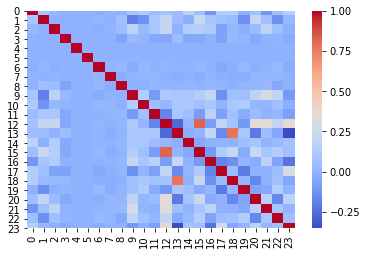

In [379]:
new_X = np.delete(new_X, 14, 1)

dataframe = pd.DataFrame(new_X)
corr = dataframe.corr()
corr.style.background_gradient(cmap='coolwarm')

sns_plot = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm').get_figure()
sns_plot.savefig("../brazilian-load-prediction/imagens/correlation_new2.pdf")

In [360]:
values = np.insert(new_X, new_X.shape[1], y, 1)
dataframe = pd.DataFrame(values)
corr = dataframe.corr(min_periods=1000)
corr[24]

0     0.698490
1     0.123344
2     0.127223
3     0.007854
4    -0.442780
5    -0.112427
6     0.215391
7    -0.121231
8    -0.102613
9     0.108180
10    0.072742
11    0.069524
12    0.156654
13    0.171870
14    0.126220
15    0.043804
16    0.024153
17    0.094689
18    0.147149
19    0.026409
20    0.083422
21   -0.179936
22    0.089517
23    0.083190
24    1.000000
Name: 24, dtype: float64

In [361]:
new_X = np.delete(new_X, 3, 1)

### New Training

In [380]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, y, test_size = 0.2 , random_state = 0)
sc = StandardScaler()
new_X_train = sc.fit_transform(new_X_train)
new_X_test = sc.transform(new_X_test)

new_network = Sequential()
new_network.add(Dense(input_dim=new_X_train.shape[1], output_dim=44, activation='relu', bias_initializer='random_normal'))
new_network.add(Dense(output_dim=1, activation='linear', bias_initializer='random_normal'))
new_network.compile(optimizer='adam', loss='mean_squared_error')
new_history = History()

new_network.fit(new_X_train, new_y_train, epochs=50, callbacks=[history])
new_y_pred = new_network.predict(new_X_test)

/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=24, activation="relu", bias_initializer="random_normal", units=44)`
  import sys
/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", bias_initializer="random_normal", units=1)`
  


Epoch 1/50
93339/93339 [==============================] - 4s 42us/step - loss: 400.0219
Epoch 2/50
93339/93339 [==============================] - 3s 32us/step - loss: 17.9851
Epoch 3/50
93339/93339 [==============================] - 3s 33us/step - loss: 10.3850
Epoch 4/50
93339/93339 [==============================] - 3s 32us/step - loss: 8.2162
Epoch 5/50
93339/93339 [==============================] - 3s 34us/step - loss: 6.8680
Epoch 6/50
93339/93339 [==============================] - 3s 33us/step - loss: 5.8374
Epoch 7/50
93339/93339 [==============================] - 3s 33us/step - loss: 5.0663
Epoch 8/50
93339/93339 [==============================] - 3s 32us/step - loss: 4.5247
Epoch 9/50
93339/93339 [==============================] - 3s 32us/step - loss: 4.1347
Epoch 10/50
93339/93339 [==============================] - 3s 32us/step - loss: 3.8817
Epoch 11/50
93339/93339 [==============================] - 3s 33us/step - loss: 3.7218
Epoch 12/50
93339/93339 [=======================

In [364]:
new_X_train.shape[1]

23

In [366]:
new_X_test.shape[1]

23